# Part 1. Plot the gender degree data and make it look nice.

In [1]:
#importing all the required libraries i.e: pandas,matplotlib,numpy.  
import pandas as pd
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Read the data into a pandas DataFrame.    
gender_degree_data = pd.read_csv("http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv") 

In [3]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [4]:
# List of the majors (See the .csv file)
majors = ['Health Professions', 'Public Administration', 'Education', 'Psychology',    
          'Foreign Languages', 'English', 'Communications\nand Journalism',    
          'Art and Performance', 'Biology', 'Agriculture',    
          'Social Sciences and History', 'Business', 'Math and Statistics',    
          'Architecture', 'Physical Sciences', 'Computer Science',    
          'Engineering'] 

## A graph has been plotted which illustrates the percentage of degrees given to women in different majors during the period (1970-2012).
* **Matplotlib** library functions are used to plot the graph and improve its outlook.
* Years are on the x-axis.
* The percentage of degrees are on the y-axis.
* Legends for each line are shown on the right side of the plot.
* Each major is differentiated by a different color.

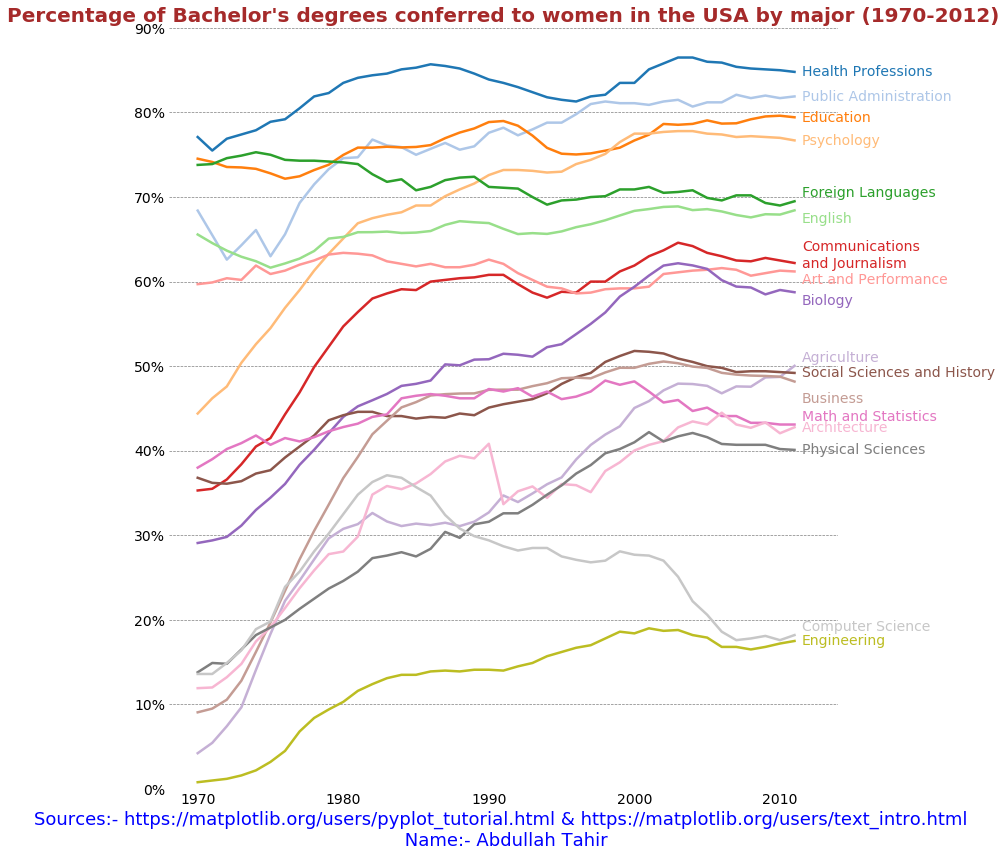

In [5]:
# We're going to make this plot taller so we can see the data better
plt.figure(figsize=(12, 14)) # sets size of plot. Common sizes are (10, 7.5) and (12, 9)

# Insert code here to remove plot frame lines. Use the spines function
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

# Insert code here to only show the tick marks on the left and bottom
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# Insert code here to only show the plot in the limits of the data 0-90% and 1968-2014
plt.ylim(0, 90)
plt.xlim(1968, 2014)

# Insert code here to change the tick marks on the left to be 0%, 10%, etc. Also make the fontsize=14
plt.yticks(range(0,91,10),[str(x)+'%' for x in range(0,91,10)],fontsize=14)
plt.xticks(fontsize=14)
# Make dashed lines across the plot at each of 0%, 10%, ..., 90%. Hint: use plot to plot dashed lines with a for loop

for y in range(0,91,10):
    plt.plot([1968,2014],[y,y],'--',color='black',lw=0.7,alpha=0.5)

# Remove the tick marks with plt.tickparams
plt.tick_params(axis=u'both', which=u'both',length=0)

for rank, column in enumerate(majors):
    # Plot each line separately with its own color, using the Tableau 20 color set in order
    plt.plot(gender_degree_data.Year.values, gender_degree_data[column.replace("\n", " ")].values, lw=2.5,
             color=tableau20[rank])
    
    
    # Add a text label to the right end of every line. Most of the code below    
    # is adding specific offsets y position because some labels overlapped.    
    y_pos = gender_degree_data[column.replace("\n", " ")].values[-1] - 0.5 
    
        
    # Notice that some of the text labels are overlapping. Can you use an if statement to make adjustments to these?
    
    if column == 'Foreign Languages':
        y_pos+=1
    elif column == 'English':
        y_pos-=1
    elif column == 'Art and Performance':
        y_pos-=1
    elif column == 'Biology':
        y_pos-=1
    elif column == 'Agriculture':
        y_pos+=1
    elif column == 'Math and Statistics':
        y_pos+=1
    elif column == 'Business':
        y_pos-=2
    elif column == 'Computer Science':
        y_pos+=1    
        
    plt.text(2011.5, y_pos, column, fontsize=14, color=tableau20[rank])
    
# Make the title of the plot "Percentage of Bachelor's degrees conferred to women in the USA by major (1970-2012)
plt.title("Percentage of Bachelor's degrees conferred to women in the USA by major (1970-2012)")
# Does this look OK? Can you make it look better? Maybe bigger?
plt.title("Percentage of Bachelor's degrees conferred to women in the USA by major (1970-2012)",fontsize=20,fontweight='bold',color='brown')

# Add text at the bottom of the plot that cites the source and your name on two separate lines using one line of code
plt.xlabel('Sources:- https://matplotlib.org/users/pyplot_tutorial.html & https://matplotlib.org/users/text_intro.html \n Name:- Abdullah Tahir', fontsize=18, color='blue')

# Show the plot
plt.show()

# Extra credit: Can you get the plotly library to work with this plot for interactive display?

## To improve the above graph and to make it interactive, Plotly library is imported and its functions are used.

* To use the plotly library and import it, its package has to be installed on anaconda.
* There is a plotly cloud where u can create graphs easily and save files. Those files can be exported as well.
* Firstly, I uploaded **http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv** file to my plotly account and then used it to plot the graph.
* Then, i exported that graph here using **get_figure()** function and displayed the graph here using **iplot()** function.
* It is an interactive graph and it shows x,y axis values of a point on a line on hovering.
* Zoom in or zoom out feature is available in this plot.
* Values at a particular point can be compared.
* The interface to plot the graph is extremely friendly.

** Note:- Sources from i took help are as follows:**
1. https://plot.ly/python/getting-started/
2. https://plot.ly/python/get-requests/

In [6]:
#import plotly library
import plotly.plotly as py

#import plot from plotly cloud
fig = py.get_figure("https://plot.ly/~atahir/2/")

#display the plot
py.iplot(fig)



# Part 2: Let's look at using some plots with error bars.

In [7]:

# This will allow us to compute some statistics
from scipy.stats import sem

# Take an array of numbers and produce a function that averages the n-values around each number to smooth the data
def sliding_mean(data_array, window=5):

    return array(new_list)

# Load the climate data
data_names = ['Date Number', 'Year', 'Month', 'Day', 'Day of Year', 'Anomaly']
climate_data = pd.read_table("http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_daily.txt",names=data_names,
                            comment='%',delim_whitespace=True) 

# Let's see what the climate data look like; did they load correctly? (Comment this line out after you have verified that
# your data has loaded correctly)
#climate_data

In [8]:
# First, let's extract some statistics from our pandas DataFrame
years = climate_data.groupby("Year").Anomaly.mean().keys()
mean_anomalies = climate_data.groupby("Year").Anomaly.mean().values
sem_anomalies = climate_data.groupby("Year").Anomaly.apply(sem).values

## A graph has been plotted which describes the mean anomaly for each year noted in the context of surface temperature between 1880-2014. 

* In order to visualize the graph better, functions from matplotlib library are used.
* **Years** are on the x-axis.
* **Mean anomaly of each year** is on the y-axis.


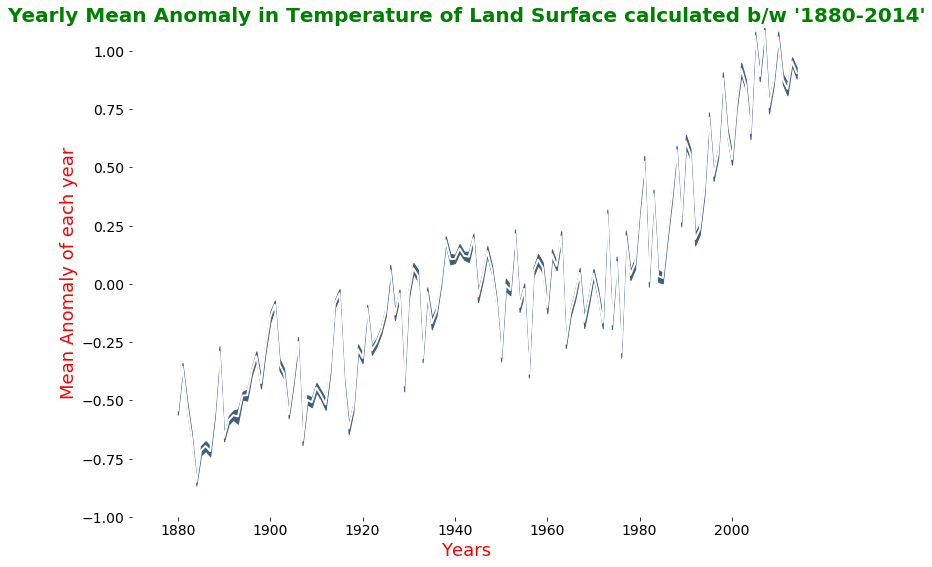

In [9]:
# Now, let's see a plot with the standard error

# resize graph
plt.figure(figsize=(12,9))

# remove plot frame lines
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

# show tick marks on bottom and left
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# set limits of x-axis and y-axis where the data is confined
plt.ylim(-1, 1.1)
plt.xlim(1870, 2015)

# set fontsize=14 for tick marks
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# set labels for a-axis and y-axis
plt.ylabel('Mean Anomaly of each year',fontsize=18,color='red')
plt.xlabel('Years',fontsize=18,color='red')

# set title for plot
plt.title("Yearly Mean Anomaly in Temperature of Land Surface calculated b/w '1880-2014'",color='green',fontsize=20,fontweight='bold')

plt.fill_between(years,mean_anomalies - sem_anomalies,mean_anomalies + sem_anomalies, color = "#3F5D7D")
plt.plot(years, mean_anomalies, color="white", lw=2)


What can we do to make this plot look better?
1. We can expand the standard error to better visualize it.
2. As in the first plot we made, let's resize the plot to (12,9), remove the plot frame lines, only have axis ticks on the left and bottom, limit the range of the plot to only where we have data, and make the ticks a little bigger so they're easy to see.
3. Add a title.
4. Add axes labels.

# Part 3: For our third visualization, let's create some histograms of the climate data.

## A histogram has been plotted which shows the number of times a particular anomaly was recorded b/w 1880-2014

* **Anomalies** are on the x-axis.
* The **frequency** at which they were recorded is on y-axis.
* In order to analyze it better, matplotlib library functions are used.

(array([  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          5.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          8.00000000e+00,   1.00000000e+01,   1.80000000e+01,
          1.50000000e+01,   2.10000000e+01,   2.20000000e+01,
          4.00000000e+01,   4.30000000e+01,   4.30000000e+01,
          5.60000000e+01,   8.10000000e+01,   8.50000000e+01,
          1.16000000e+02,   1.25000000e+02,   1.45000000e+02,
          1.69000000e+02,   1.83000000e+02,   2.55000000e+02,
          2.41000000e+02,   3.60000000e+02,   4.13000000e+02,
          4.10000000e+02,   5.03000000e+02,   5.80000000e+02,
          6.81000000e+02,   8.07000000e+02,   9.33000000e+02,
          1.09900000e+03,   1.24900000e+03,   1.26800000e+03,
          1.55900000e+03,   1.69500000e+03,   1.79500000e+03,
          1.86200000e+03,   1.94800000e+03,   1.91500000e+03,
        

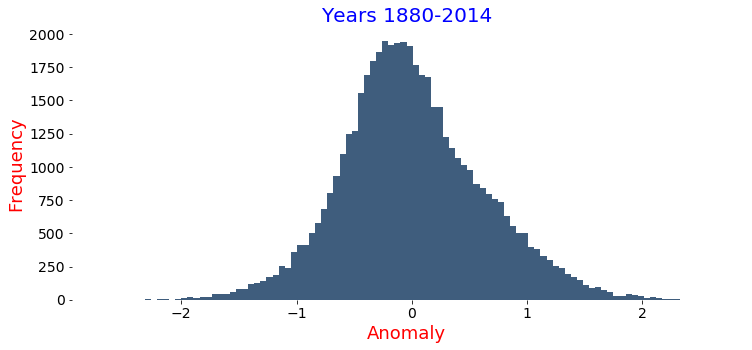

In [10]:
# make graph a little bit bigger
plt.figure(figsize=(12,5))

# remove all plot frame lines and enable left and bottom tick marks.
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# make fontsize bigger for ticks of x-axis and y-axis
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# set labels for x-axis and y-axis
plt.ylabel('Frequency',fontsize=18,color='red')
plt.xlabel('Anomaly',fontsize=18,color='red')

#set a title
plt.title('Years 1880-2014',fontsize=20,color='blue')

# Plot a histogram of the anomalies data
plt.hist(climate_data.Anomaly, color="#3F5D7D", bins=100)

First, again make this plot look nice. Use the same steps we used before to improve the look of this plot.
This histogram is interesting in that it show that for the most part the data are centered around an anomaly of 0, maybe even a little left of 0. But this ignores the temporal nature of the data.
Plot 10 histograms, where you show the histogram of the anomaly data for 10 equal sized chunks of years, from 1880 to 2014. Each of these plots should look nice too. Can you create a function that automatically applies your plot settings so you only have to write the code once?

## The above plot showed the data for 134 years. To analyze the data more in depth, these years are divided into 10 equal chunks. 

* There are now 10 histograms which show the frequency of anomalies in their specific years.
* Matplotlib library functions are used to make the plots better to visualize and analyze.

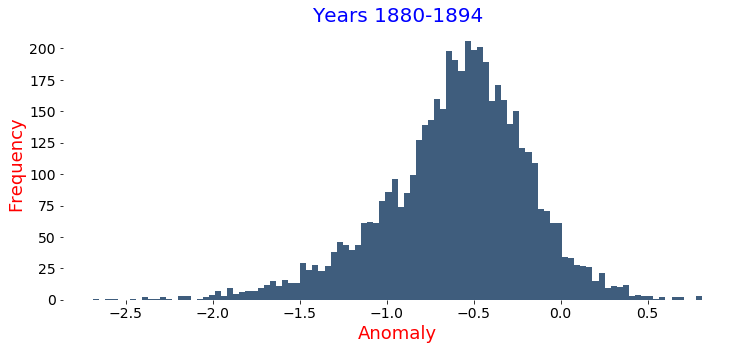

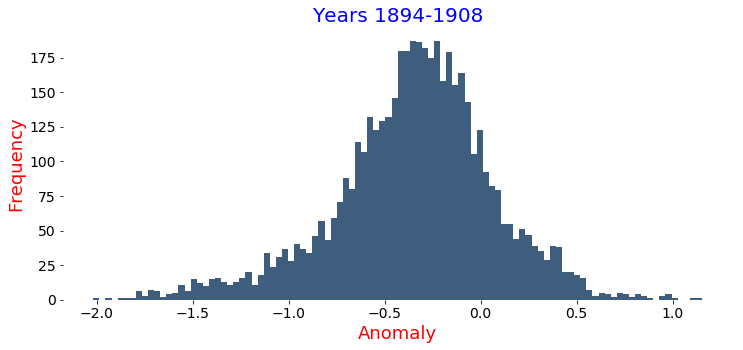

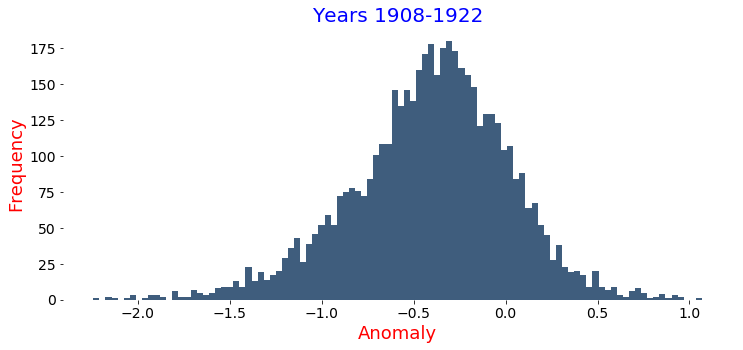

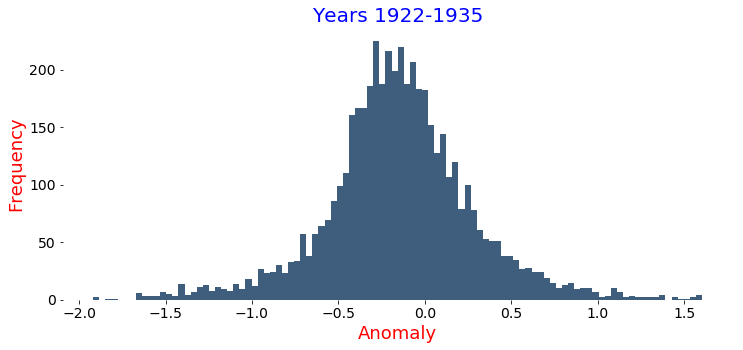

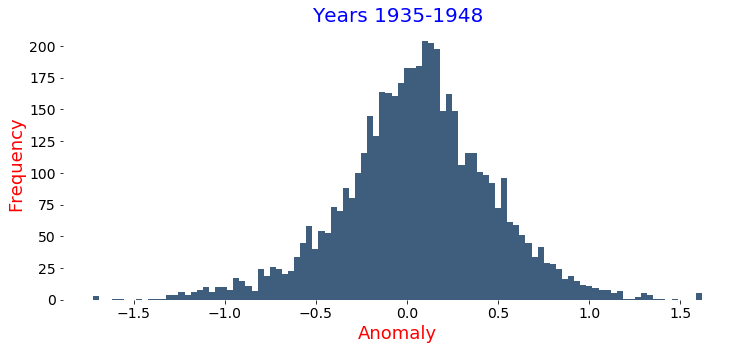

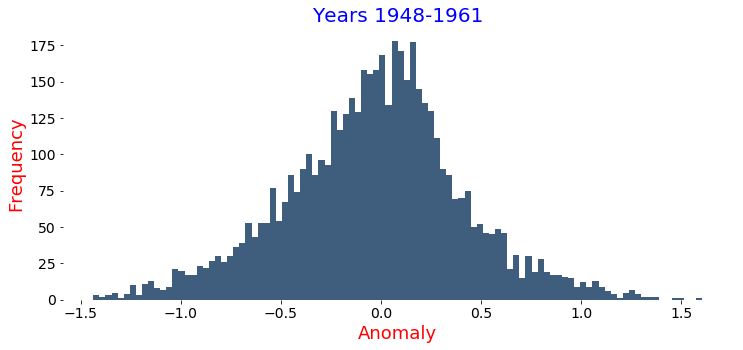

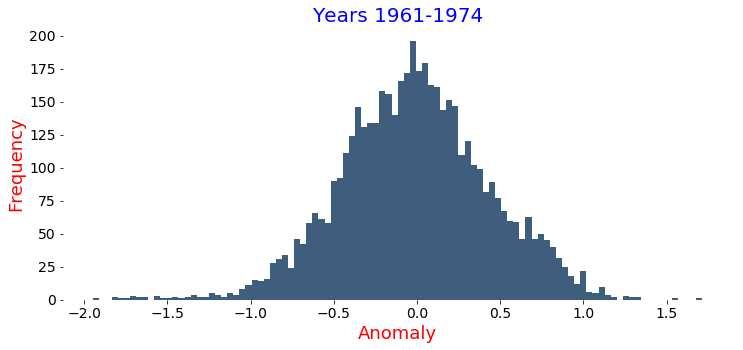

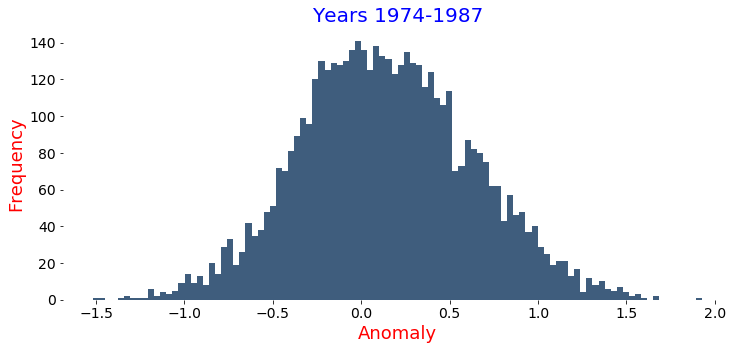

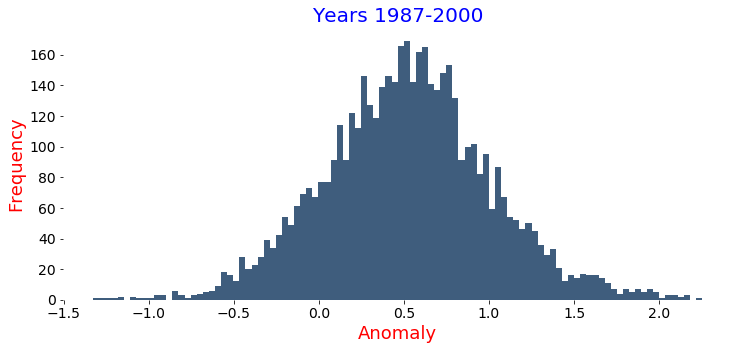

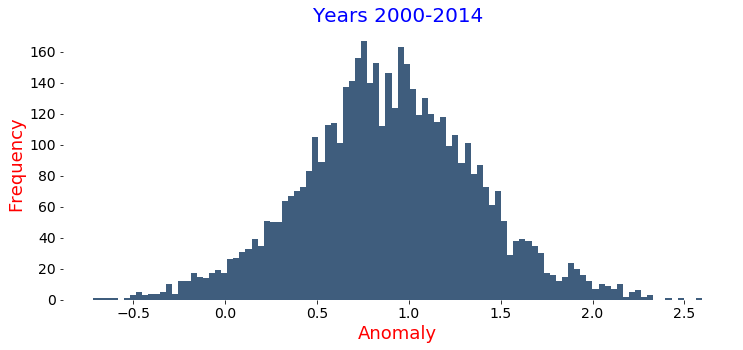

In [11]:
# This functions take list of anomalies from specific years and plot a histogram. All matplotlib library functions are 
# inserted into this functions. So, each histogram is nicely labelled and formatted.

def histogram(years):
    
    # make plot bigger
    plt.figure(figsize=(12,5))
    
    # remove plot frame lines and enabling ticks on bottom and left of the plot
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    # make ticks bigger for x-axis and y-axis
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    
    #set labels for x-axis and y-axis
    plt.ylabel('Frequency',fontsize=18,color='red')
    plt.xlabel('Anomaly',fontsize=18,color='red')
    
    #plot histogram
    plt.hist(years,color="#3F5D7D", bins=100)
    

# Here, 'anomaly' array from climate_data is sliced in such a way that it has data for approx 13.4 years. Each chunk contains 
# data of 4390 anomalies i.e data of 13.4 years. 

year_chunk1=climate_data.Anomaly[0:4930]
year_chunk2=climate_data.Anomaly[4930:9860]
year_chunk3=climate_data.Anomaly[9860:14790]
year_chunk4=climate_data.Anomaly[14790:19720]
year_chunk5=climate_data.Anomaly[19720:24650]
year_chunk6=climate_data.Anomaly[24560:29580]
year_chunk7=climate_data.Anomaly[29580:34510]
year_chunk8=climate_data.Anomaly[34510:39440]
year_chunk9=climate_data.Anomaly[39440:44370]
year_chunk10=climate_data.Anomaly[44370:49308]


# Passing each chunk of years as a parameter to a function. Each histogram is titled by the range of years.

histogram(year_chunk1)
plt.title('Years 1880-1894',fontsize=20,color='blue')
histogram(year_chunk2)
plt.title('Years 1894-1908',fontsize=20,color='blue')
histogram(year_chunk3)
plt.title('Years 1908-1922',fontsize=20,color='blue')
histogram(year_chunk4)
plt.title('Years 1922-1935',fontsize=20,color='blue')
histogram(year_chunk5)
plt.title('Years 1935-1948',fontsize=20,color='blue')
histogram(year_chunk6)
plt.title('Years 1948-1961',fontsize=20,color='blue')
histogram(year_chunk7)
plt.title('Years 1961-1974',fontsize=20,color='blue')
histogram(year_chunk8)
plt.title('Years 1974-1987',fontsize=20,color='blue')
histogram(year_chunk9)
plt.title('Years 1987-2000',fontsize=20,color='blue')
histogram(year_chunk10)
plt.title('Years 2000-2014',fontsize=20,color='blue')


    
    